<a href="https://colab.research.google.com/github/2203a51531/AIML-BATCH-10/blob/main/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('/content/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
print("following is a breakup of credit approval status.\n 1 means approved credit,0 means not approved.")
print(df['credit.policy'].value_counts())

following is a breakup of credit approval status.
 1 means approved credit,0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


Text(0.5, 0, 'fico score')

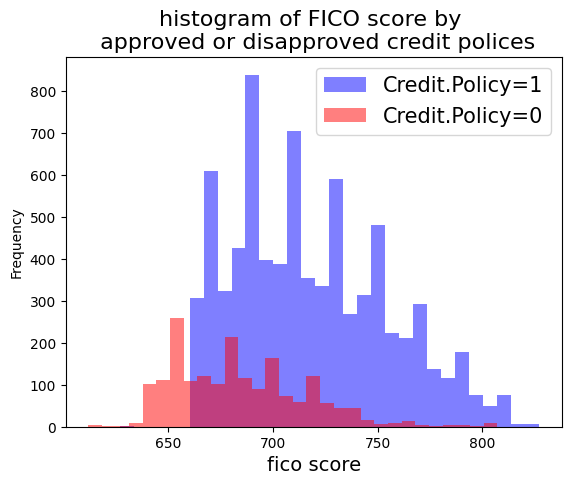

In [11]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')

df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')


plt.legend(fontsize=15)
plt.title("histogram of FICO score by \n approved or disapproved credit polices",fontsize=16)

plt.xlabel("fico score",fontsize=14)

Text(0, 0.5, 'Intrest rate')

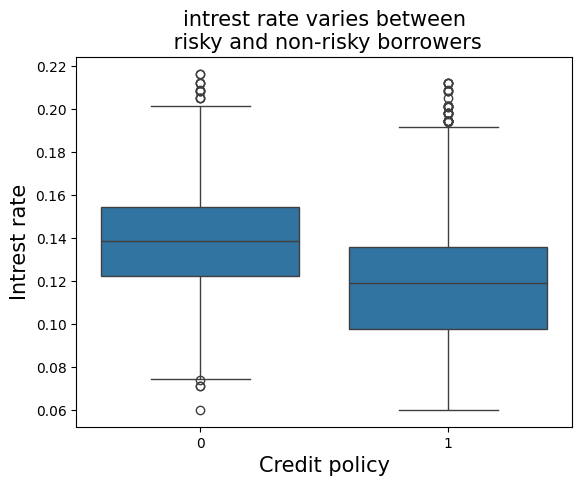

In [12]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("intrest rate varies between\n risky and non-risky borrowers",fontsize=15)

plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Intrest rate",fontsize=15)

Text(0.5, 0, 'purpose')

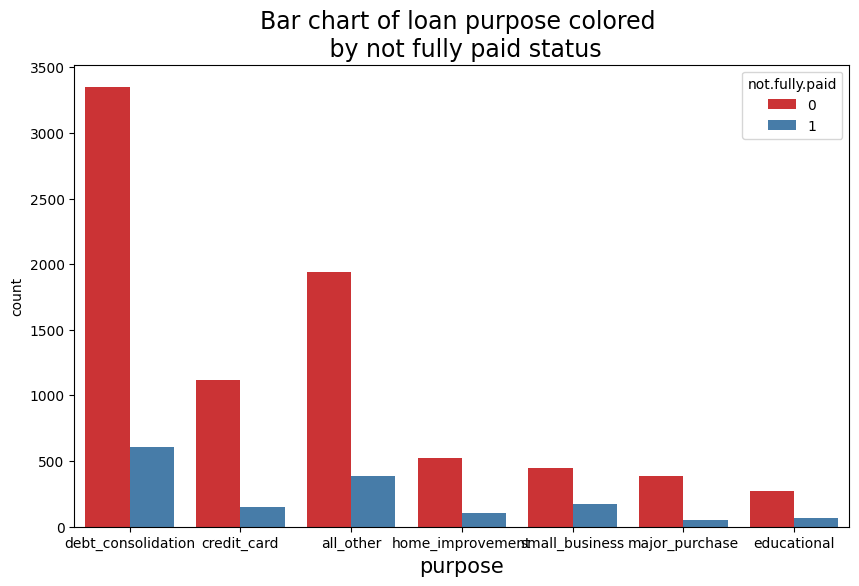

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')
plt.title("Bar chart of loan purpose colored \n by not fully paid status",fontsize=17)
plt.xlabel("purpose",fontsize=15)

In [14]:
df_final=pd.get_dummies(df,['purpose'],drop_first=True)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split
X=df_final.drop('not.fully.paid',axis=1)
y=df_final['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random=121)

TypeError: train_test_split() got an unexpected keyword argument 'random'

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree=DecisionTreeClassifier
(criterion ='gini',max_depth=None)
dtree.fit(X_train,y_train)
DecisionTreeClassifier()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-17-ab3d307ef89f>, line 2)

In [18]:
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

NameError: name 'dtree' is not defined

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators = 600)

In [22]:
rfc.fit(x_train , y_train)

NameError: name 'x_train' is not defined

In [23]:
rfc_pred=rfc.predict(x_test)

NameError: name 'x_test' is not defined

In [24]:
cr=classification_report(y_test,rfc_pred)

NameError: name 'classification_report' is not defined

In [25]:
print(cr)

NameError: name 'cr' is not defined